
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 1 - Modelagem do Preço </center></h1>

A presente atividade prática abordará a modelagem estocástica do preço, somado a conceituação de volatilidade, expectativa de retorno, índice Sharpe, correlação, aplicação da clusterização k-means entre outros aspectos fundamentais e quantitativos.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Brownian motion">Modelo com Movimento Browniano</a></li>
        <li><a href="#Geometric Brownian motion">Modelo com Movimento Browniano Geometrico</a></li>
        <li><a href="#Log-return">Retorno de um Ativo Financeiro</a></li>
        <li><a href="#Expected return and volatility "> Expectativa de Retorno e Volatilidade </a></li>
        <li><a href="#Risco Retorno">Diagrama Risco Retorno</a></li>
        <li><a href="#Indice Sharpe">Índice Sharpe</a></li>
        <li><a href="#Correlação">Índice de Correlação</a></li>
        <li><a href="#k_means">Clusterização K-Means</a></li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<div id="Brownian motion">
    <h2>1) Modelo de Preço com Movimento Browniano</h2>
</div>

<b>Bachelier</b> in 1900 descreveu o movimento do preço como <br>

<ul>
$ \large
\begin{equation}
 p(t)=p(0)+\mu t + \sigma w(t)\\ 
 \end{equation}
$
</ul>

Text(0.5,1,'Preço Modelado com Movimento Browniano')

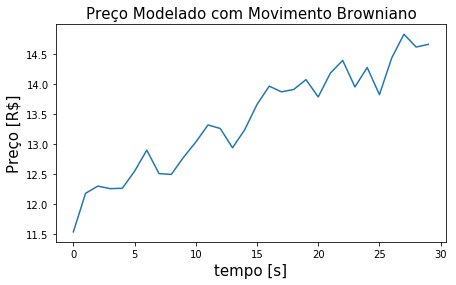

In [2]:
po=12
mu=.1
sigma=0.2
w = np.random.normal(0,1, 30)
t=np.arange(0,30)

p1=po+mu*t+sigma*w

fig = plt.subplots(figsize=(7, 4))
plt.plot(p1)
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preço Modelado com Movimento Browniano',fontsize=15)


<div id="Geometric Brownian motion">
    <h2>2) Modelo de Preço com Movimento Browniano Geometrico</h2>
</div>

Uma melhor modelagem corresponde ao <b>Movimento Geometrico Browniano</b> definido por 
<ul>
$ \large
\begin{equation} 
 \frac{dp(t)}{p(t)}  = \mu dp(t) + \sigma dw(t) \\
 p(t)  =p(0)exp[(\mu-\frac{\sigma^2}{2})t+\sigma w(t)] 
\end{equation} 
$
</ul>

Text(0.5,1,'Preço Modelado com movimento browniano Geometrico')

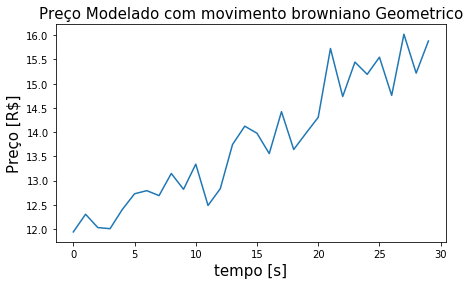

In [3]:
po=12
mu=.01
sigma=.03
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

fig = plt.subplots(figsize=(7, 4))
plt.plot(p2)
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preço Modelado com movimento browniano Geometrico',fontsize=15)

Text(0.5,1,'Preços Modelados com Movimento Browniano Geometrico')

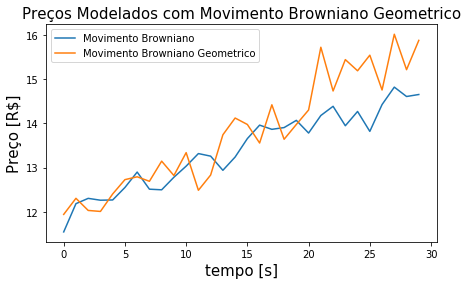

In [4]:
df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2

fig = plt.subplots(figsize=(7, 4))
plt.plot(df['p1'],label='Movimento Browniano')
plt.plot(df['p2'],label='Movimento Browniano Geometrico')

plt.legend(loc='upper left')
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preços Modelados com Movimento Browniano Geometrico',fontsize=15)


<div id="Log-return">
    <h2>3) Retorno de um Ativo Financeiro</h2>
</div>

O <b>retorno</b> de um ativo em tempo discreto pode ser definindo pelas seguintes equações

<ul>
$ \large
\begin{equation}
 r(n)=\frac{p(n)-p(n-1)}{p(n-1)} \\ 
 r(n)=\frac{p(n)}{p(n-1)}-1 \\
 r(n)=ln[p(n)]-ln[p(n-1)]=ln[\frac{p(n)}{p(n-1)}]\cong\frac{p(n)}{p(n-1)}-1 
\end{equation}
$
</ul>

Text(0.5,1,'Retorno Modelado com movimento browniano Geometrico')

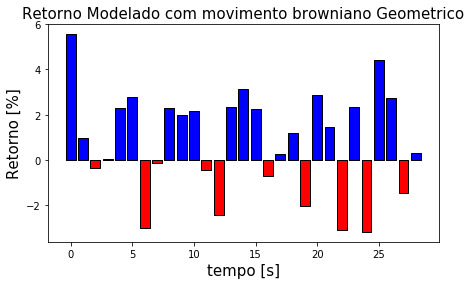

In [5]:
r1=np.log(p1[1:])-np.log(p1[0:-1])

fig = plt.subplots(figsize=(7, 4))

r1m=df['p1'][1:].values/df['p1'][0:-1].values-1
r1m[np.where(r1m>=0)]=0
plt.bar(range(len(r1)),100*r1m,color='red',edgecolor='black')

r1m=df['p1'][1:].values/df['p1'][0:-1].values-1
r1m[np.where(r1m<0)]=0
plt.bar(range(len(r1)),100*r1m,color='blue',edgecolor='black')


plt.ylabel('Retorno [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico',fontsize=15)


Text(0.5,1,'Retorno Modelado com movimento browniano Geometrico')

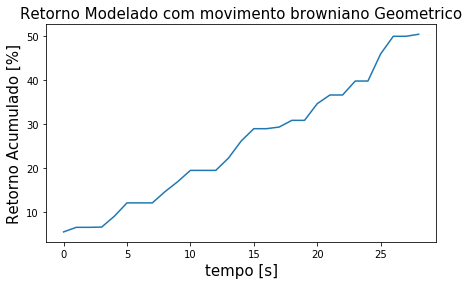

In [6]:
def sumper(per):
    persum=np.cumprod(1 + per) - 1
    return 100*persum

fig = plt.subplots(figsize=(7, 4))

plt.plot(sumper(r1m))
plt.ylabel('Retorno Acumulado [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico',fontsize=15)

Text(0.5,1,'Retornos Modelados com Movimento Browniano Geometrico')

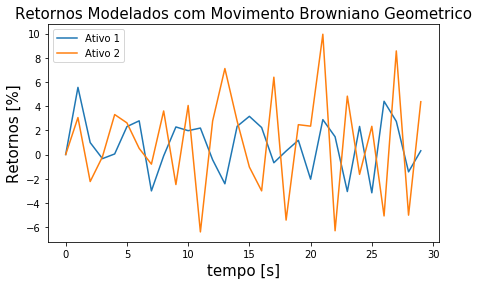

In [7]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=np.concatenate(([0], r2), axis=0)
#fig = plt.subplots()
#df[['r1','r2']].plot()
#df

fig = plt.subplots(figsize=(7, 4))
plt.plot(100*df['r1'],label='Ativo 1')  
plt.plot(100*df['r2'],label='Ativo 2') 
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.ylabel('Retornos [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retornos Modelados com Movimento Browniano Geometrico',fontsize=15)

In [8]:
print("Inicio do Data Frame:")
print(df.head())
print("")
print("Fim do Data Frame:")
print(df.tail())
print("")
print("Algumas Informações:")
print(df.describe())

Inicio do Data Frame:
          p1         p2        r1        r2
0  11.541795  11.938827  0.000000  0.000000
1  12.182258  12.303308  0.055491  0.030529
2  12.302249  12.028390  0.009850 -0.022345
3  12.260269  12.005768 -0.003412 -0.001881
4  12.265967  12.402255  0.000465  0.033025

Fim do Data Frame:
           p1         p2        r1        r2
25  13.819944  15.547362 -0.031649  0.023303
26  14.428001  14.758097  0.043998 -0.050765
27  14.823177  16.021528  0.027390  0.085609
28  14.610626  15.218455 -0.014339 -0.050125
29  14.655865  15.882653  0.003096  0.043644

Algumas Informações:
              p1         p2         r1         r2
count  30.000000  30.000000  30.000000  30.000000
mean   13.398090  13.792702   0.008233   0.010465
std     0.880709   1.274211   0.022305   0.043447
min    11.541795  11.938827  -0.031649  -0.063979
25%    12.606786  12.742567  -0.004141  -0.020859
50%    13.487184  13.692071   0.010803   0.023370
75%    14.042951  14.752536   0.023164   0.035241
ma

<div id="Expected return and volatility">
    <h2>4) Expectativa de Retorno e Volatilidade</h2>
</div>


A <b>Média</b> and <b>Desvio Padrão</b> do retorno de um ativo, $\mu$ and $\sigma$, são definidos com a <b>expectativa de retorno</b> e a  <b>volatilidade</b> de um ativo
<ul>
$ \large
\begin{equation} 
\mu=E\{ r(n) \}=E\{\frac{p(n)-p(n-1)}{p(n-1)}\} \\
\sigma=(E\{r^{2}(n)\}-\mu )^{\frac{1}{2}} \\
\end{equation}
$
</ul>

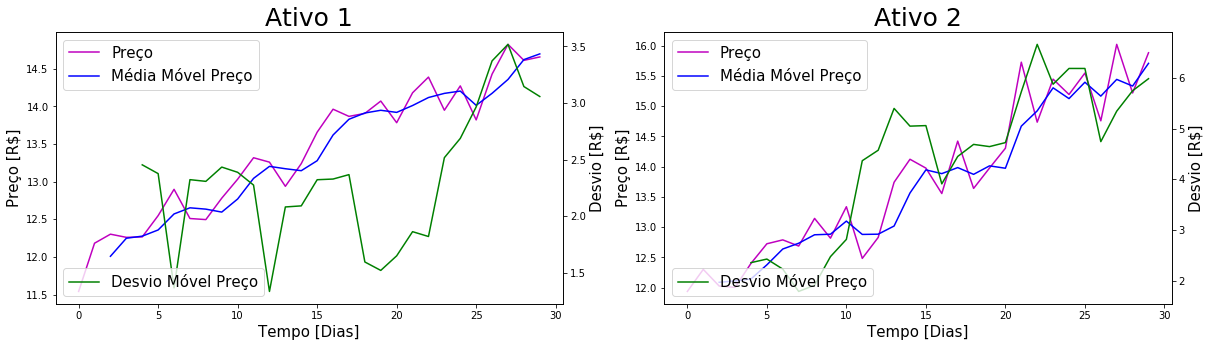

In [9]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=100*np.concatenate(([0], r1), axis=0)

r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=100*np.concatenate(([0], r2), axis=0)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,2, 1) 
ax1.plot(df['p1'], color='m',label='Preço')  
ax1.plot(df['p1'].rolling(window=3).mean(), color='b',label='Média Móvel Preço')  

ax2 = ax1.twinx()
ax2.plot(df['r1'].rolling(window=5).std(), color='g',label='Desvio Móvel Preço')  
ax1.set_title('Ativo 1',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_ylabel('Desvio [R$]',fontsize=15)
ax1.set_xlabel('Tempo [Dias]',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='lower left',fontsize=15)

ax1=plt.subplot(1,2, 2) 
ax1.plot(df['p2'], color='m',label='Preço')  
ax1.plot(df['p2'].rolling(window=3).mean(), color='b',label='Média Móvel Preço')  

ax2 = ax1.twinx()
ax2.plot(df['r2'].rolling(window=5).std(), color='g',label='Desvio Móvel Preço')  
ax1.set_title('Ativo 2',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_ylabel('Desvio [R$]',fontsize=15)
ax1.set_xlabel('Tempo [Dias]',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='lower left',fontsize=15)


<div id="Risco Retorno">
    <h2>5) Diagrama Risco Retorno</h2>
</div>


Em um <b>diagrama retorno x risco </b> para um dado retorno previsto o risco também é estimado

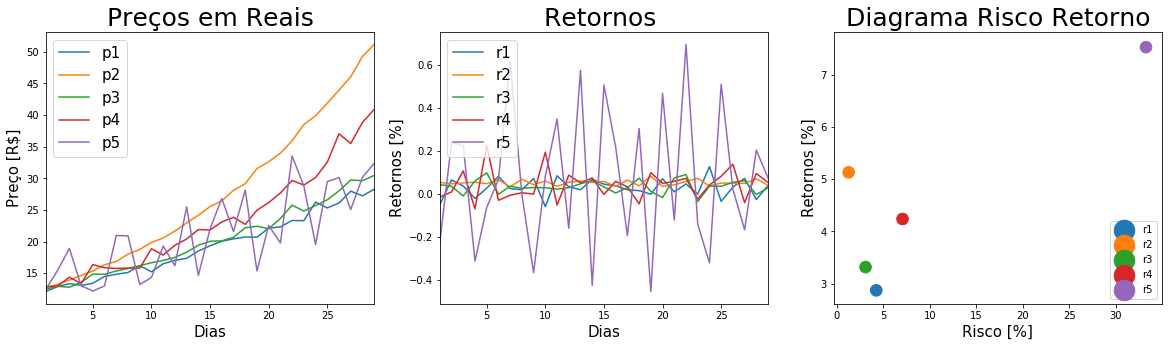

In [10]:
def MBG(po,mu,sigma,t):
    w = np.random.normal(0,1, t)
    t=np.arange(0,t)
    return po*np.exp((mu-(sigma**2)/2)*t+sigma*w)


po    =    [12,   12,   12,   12, 12]
mu    =    [.03, 0.05, 0.033, 0.041, 0.06]
sigma =    [0.03,  0.01,  0.02, 0.05, 0.22]
t     =    30

df=None

for i in range(len(po)):
    
    if df is None:
        df=pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))
    else:
        df=pd.concat([df,pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))],axis=1)

df.columns=list(['p'+str(x) for x in range(1,len(po)+1)])
df.head()
ret=df.pct_change()
ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])
df=pd.concat([df, ret], axis=1)
df=df.dropna()
df.head()

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,3, 1) 
df[df.columns[:5]].plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dias',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax1=plt.subplot(1,3, 2) 
df[df.columns[5:]].plot(ax=ax1)
ax1.set_title('Retornos ',fontsize=25)
ax1.set_ylabel('Retornos [%]',fontsize=15)
ax1.set_xlabel('Dias',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax3=plt.subplot(1,3, 3) 
colors = np.random.rand(5)
x = df[df.columns[5:]].std().values
y = df[df.columns[5:]].mean().values
classes = df[df.columns[5:]].mean().values/df[df.columns[5:]].std().values


colors = ['b', 'darkorange', 'green', 'r', 'purple']
for i in range(len(x)):

    ax3.scatter(100*x[i],100*y[i],  s=200*classes, label='r'+str(1+i))

plt.legend(loc='lower right')


plt.ylabel('Retornos [%]',fontsize=15)
plt.xlabel('Risco [%]',fontsize=15)

plt.title('Diagrama Risco Retorno',fontsize=25)
plt.show()


<div id="Indice Sharpe">
    <h2>6) Indice Sharpe</h2>
</div>



O <b>Índice de Sharpe</b> foi criado por William Sharpe (Nobel de Economia em 1990) e permite avaliar a relação entre o retorno e o risco de um investimento. Ele mede qual é a relação entre o retorno excedente ao ativo livre de risco e a volatilidade.
O <b>Índice Sharpe</b> é definido por
<ul>


$ \Large
\begin{equation} 
 SR=\frac{\mu-r_f}{\sigma}  
\end{equation}
$


</ul>

In [11]:
sharpe5=(df['r5'].mean()-5/(12*100))/df['r5'].std()
sharpe2=(df['r2'].mean()-5/(12*100))/df['r2'].std()
print("Indice Sharpe de r5 = %.2f e Indice Shape de r2 = %.2f" % (sharpe5, sharpe2))

Indice Sharpe de r5 = 0.21 e Indice Shape de r2 = 3.67


<div id="Correlação">
    <h2>7) Indice de Correlação</h2>
</div>



O <b>coeficiente de correlação </b> de Pearson ou "ρ de Pearson" identifica o grau da correlação entre duas variáveis &emsp;

<ul> 
$ \large
\begin{equation}  
 cov[r_1(n),r_2(n)]=E\{r_{1}(n)r_{2}(n)\}-\mu_{1} \mu \\[10pt]
 \rho=\frac{E\{r_{1}(n)r_{2}(n)\}-\mu_{1} \mu_{2}}{\sigma_{1} \sigma_{2}} \\
\end{equation}  
$
</ul>


In [12]:
cor1=(np.mean(df['r1']*df['r2'])-np.mean(df['r1'])*np.mean(df['r2']))/(np.std(df['r1'])*np.std(df['r2']))
cor2=df[['r1','r2']].corr()

print("Indice de correlação pela equação explícita (%.2f) e função implícita (%.2f)" % (cor1, cor2['r1'][1]))

Indice de correlação pela equação explícita (-0.42) e função implícita (-0.42)


In [13]:
print('Matriz de Correlações')
print('')
print(df[df.columns[5:]].corr())

Matriz de Correlações

          r1        r2        r3        r4        r5
r1  1.000000 -0.422759 -0.008605 -0.245470 -0.012821
r2 -0.422759  1.000000 -0.237517  0.139578 -0.256873
r3 -0.008605 -0.237517  1.000000  0.142208 -0.025001
r4 -0.245470  0.139578  0.142208  1.000000 -0.006045
r5 -0.012821 -0.256873 -0.025001 -0.006045  1.000000


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 29 09:11:31 2018

@author: mrclnndrd
"""
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
sns.set()


STOCKS=['arquivo/USIM5_H1_201601041000_201801291700.csv','arquivo/GGBR4_H1_201601041000_201801291700.csv',
        'arquivo/PETR3_H1_201601041000_201801291700.csv','arquivo/MGLU3_H1_201601041000_201801291700.csv',
        'arquivo/BBAS3_H1_201601041000_201801291700.csv','arquivo/NATU3_H1_201601041000_201801291700.csv',
        'arquivo/PETR4_H1_201601041000_201801291700.csv','arquivo/FIBR3_H1_201601041000_201801291700.csv',
        'arquivo/BVMF3_H1_201601041000_201801291700.csv','arquivo/VALE3_H1_201601041000_201801291700.csv']


Name=[]
for p in range(0,  len(STOCKS)):
    df = read_csv(STOCKS[p], header=None)
    DATE=[]
    TIME=[]
    OPEN=[]
    HIGH=[]
    LOW=[]
    CLOSE=[]
    TVOL=[]
    RVOL=[]
    S=[]
    for k in range(1,  len(df)):
        Date,Time,Open,High,Low,Close,TVol,RVol,s =df.iloc[k][0].split("\t")
        DATE.append(datetime.strptime(Date+" "+Time,"%Y.%m.%d %H:%M:%S"))
        OPEN.append(float(Open))
        HIGH.append(float(High))    
        LOW.append(float(Low))
        CLOSE.append(float(Close))  
        TVOL.append(int(TVol))
        RVOL.append(int(RVol))
        S.append(s)
    stock=pd.DataFrame([DATE,OPEN,HIGH,LOW,CLOSE,TVOL,RVOL]).transpose()    
    stock.columns = ['DATE','OPEN','HIGH','LOW','CLOSE','TVOL','RVOL']
    stock.set_index('DATE', inplace=True)
    if p==0:
        result = stock['CLOSE'].astype(float) #pd.concat([stock['CLOSE'], stock['CLOSE']], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][8:13])  
    if p==1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])            
        Name.append(STOCKS[p][8:13])       
    if p>1:
        stock_old=stock
        result = pd.concat([result[:], stock_old['CLOSE'].astype(float)], axis=1, join_axes=[stock.index])    
        Name.append(STOCKS[p][8:13]) 
result.columns=Name
corre=result.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

<div id="k_means">
    <h2>7) Clusterização K-Means</h2>
</div>


A técnica de aprendizado de maquina denominada <b>K-Means</b> é um das mais populares de "clustering" não supervisionado. O K significa os centróides que são aplicados para definir os clusters. Um ponto é considerado em um cluster específico se estiver mais próximo do centróide desse cluster do que de qualquer outro centróide.
Algoritmo K-Means: 

<ol> &emsp;
  <li>Inicia $k$ centroides ($\normalsize \mu_1,\mu_2,....,\mu_k \in \mathbb{R}$), aleatoriamente </li> &emsp;
  <li>Para todos $i$, determine $\normalsize  c^{(i)}:= argmin_j ||x^{(i)} - \mu_j ||^2$</li> &emsp;
  <li>Para todos $j$, determine $\normalsize  \mu_j:= \frac{\sum_{i=1}^{m}1\left\{c^{(i)}=j\right\}x^{(i)} }{\sum_{i=1}^{m}1\left\{c^{(i)}=j\right\}} $</li> &emsp;
  <li>Repita os procedimentos 2 e 3 até convergir! </li> &emsp;



</ol>
O exemplo será aplicado nos ativos do Índice Amplo B3 &emsp;



In [ ]:
%matplotlib notebook 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

N_months=12

output = None
for i in range(1,13):

    df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/AcoesIndice.aspx?idioma=pt-BR&pg='+str(i))[0]['Código']
    print(len(df.values),i)
    if output is None:
        output = df          
    else:
        output=pd.concat([output,df],axis=0) 

output=output.dropna()

symbols=list(output.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
#Stocks.append('^BVSP')


today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

stocks_close=stocks_all['Adj Close'].dropna(axis=0, how='all')
stocks_close=stocks_close.dropna(axis=1, how='any')
stocks_open=stocks_all['Open'].dropna(axis=0, how='all')
stocks_open=stocks_open.dropna(axis=1, how='any')


In [ ]:
stocks_close=stocks_all['Adj Close'].dropna(axis=0, how='all')
stocks_close=stocks_close.dropna(axis=1, how='any')
print('Preços [R$]')
print(stocks_close[stocks_close.columns[:5]].head())
retornos=stocks_close.pct_change().dropna()
print('Retornos [%]')
print(retornos[retornos.columns[:5]].head())


In [ ]:
%matplotlib inline 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

stocks=retornos.columns
X=[[np.std(retornos[stocks[i]].astype(float)),np.mean(retornos[stocks[i]].astype(float))] for i in range(len(stocks))]

X = StandardScaler().fit_transform(X)

N=5

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco Normalizado',fontsize=25)
ax1.set_ylabel('Retorno Normalizado',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[list(retornos.columns[np.where(y_kmeans==i)[0]])].astype(float).mean()/retornos[list(retornos.columns[np.where(y_kmeans==i)[0]])].astype(float).std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

<b>Fim da Atividade!!!</b> 
